Let's get acquainted with Ripser.py. You can find documentation at https://ripser.scikit-tda.org/en/latest/index.html.

Start by importing some standard libraries.

In [1]:
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
import numpy as np

Let's build a point cloud (200 points from a noisy circle) and display it:

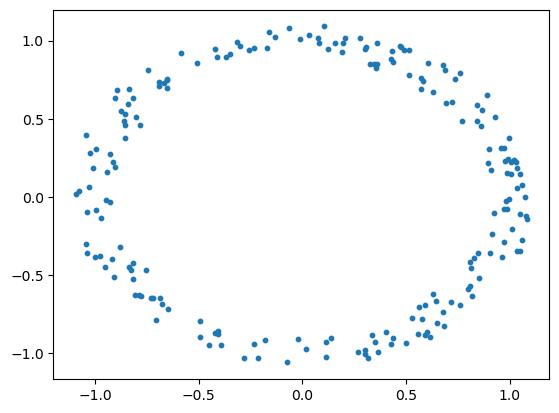

In [3]:
n_samples = 200
np.random.seed()
Z = np.random.random((n_samples, 2)) - 0.5
X = Z / np.linalg.norm(Z, axis=1).reshape((n_samples, 1)) + (np.random.random((n_samples, 2)) - 0.5) * 0.2
plt.scatter(X[:,0], X[:,1], s=10)

Now we'll plot the $H_0$ and $H_1$ persistence diagrams for this data simultaneously:

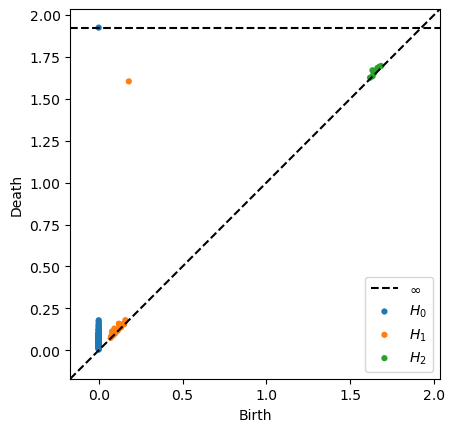

In [6]:
dgms = ripser(X, maxdim=2)['dgms']
plot_diagrams(dgms, show=True)

Note the single highly persistent $H_0$ class and $H_1$ class. This is exactly the behavior we want from persistent homology!

By default, Ripser gives persistent homology with $\mathbb{Z}/2\mathbb{Z}$ coeffients. Here's how we get coefficients in $\mathbb{Z}/3\mathbb{Z}$.

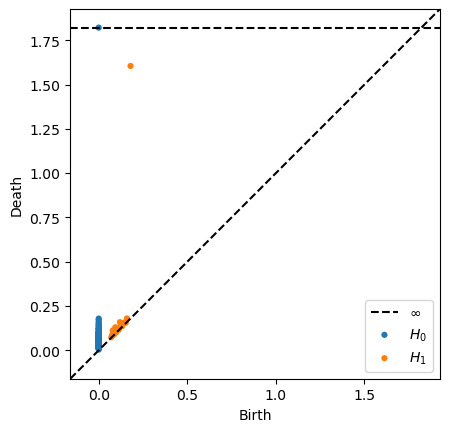

In [8]:
dgms3 = ripser(X, coeff=3)['dgms']
plot_diagrams(dgms3)

This is remarkably similar because a circle has the same mod $p$ Betti numbers for all primes $p$.

Let's build something whose homology depends on the prime $p$, namely the Klein bottle embedded in $\mathbb{R}^4$. This has parametrization

\begin{aligned}
  x &= (2+\cos v)\cos u\\
  y &= (2+\cos v)\sin u\\
  z &= \sin v \cos(u/2)\\
  t &= \sin v \sin(u/2)
\end{aligned}

where $0\le u\le 4\pi$ and $0\le v\le 2\pi$. By sampling $(u,v)$ from the rectangle $[0,4\pi]\times[0,2\pi]$ and then transforming according to the parametrization, we'll get a collection of points on the Klein bottle (embedded in $\mathbb{R}^4$).


Text(0.5, 1.0, '$\\mathbb{Z} / 3\\mathbb{Z}$')

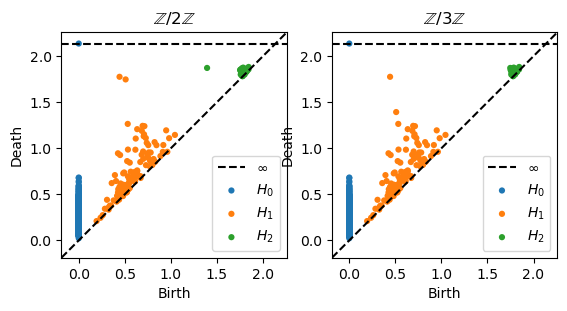

In [9]:
# Generate point cloud
n_samples = 400
Z = np.random.random((n_samples,2))
X = np.zeros((n_samples,4))
X[:,0] = (2+np.cos(2*np.pi*Z[:,1]))*np.cos(4*np.pi*Z[:,0])
X[:,1] = (2+np.cos(2*np.pi*Z[:,1]))*np.sin(4*np.pi*Z[:,0])
X[:,2] = np.sin(2*np.pi*Z[:,1])*np.cos(2*np.pi*Z[:,0])
X[:,3] = np.sin(2*np.pi*Z[:,1])*np.sin(2*np.pi*Z[:,0])

# Compute persistent homology with mod 2 and mod 3 coefficients
dgms2 = ripser(X, maxdim=2, coeff=2)['dgms']
dgms3 = ripser(X, maxdim=2, coeff=3)['dgms']

# Display persistence diagrams
fig = plt.figure()
plt.subplot(121)
plot_diagrams(dgms2)
plt.title("$\mathbb{Z} / 2\mathbb{Z}$")
plt.subplot(122)
plot_diagrams(dgms3)
plt.title("$\mathbb{Z} / 3\mathbb{Z}$")

You might have to squint, but there are two very persistent $H_1(K;\mathbb{Z}/2\mathbb{Z})$ classes and only one such class for $\mathbb{Z}/3\mathbb{Z}$. Meanwhile we see a persistent $H_2$ class mod 2 but no such classes mod 3. This is consistent with the mod 2 Betti numbers of $K$ being 1, 2, 1 while the mod 3 Betti numbers are 1, 1, 0.

Finally, let's up the number of samples and see how the output changes.

Text(0.5, 1.0, '$\\mathbb{Z} / 3\\mathbb{Z}$')

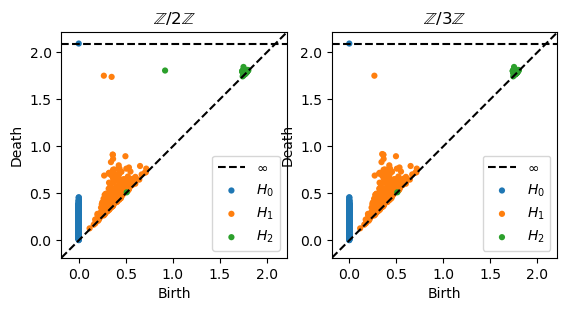

In [2]:
# Generate point cloud
n_samples = 1000
Z = np.random.random((n_samples,2))
X = np.zeros((n_samples,4))
X[:,0] = (2+np.cos(2*np.pi*Z[:,1]))*np.cos(4*np.pi*Z[:,0])
X[:,1] = (2+np.cos(2*np.pi*Z[:,1]))*np.sin(4*np.pi*Z[:,0])
X[:,2] = np.sin(2*np.pi*Z[:,1])*np.cos(2*np.pi*Z[:,0])
X[:,3] = np.sin(2*np.pi*Z[:,1])*np.sin(2*np.pi*Z[:,0])

# Compute persistent homology with mod 2 and mod 3 coefficients
dgms2 = ripser(X, maxdim=2, coeff=2)['dgms']
dgms3 = ripser(X, maxdim=2, coeff=3)['dgms']

# Display persistence diagrams
fig = plt.figure()
plt.subplot(121)
plot_diagrams(dgms2)
plt.title("$\mathbb{Z} / 2\mathbb{Z}$")
plt.subplot(122)
plot_diagrams(dgms3)
plt.title("$\mathbb{Z} / 3\mathbb{Z}$")

Just for fun, here's an attempt at making an amimation showing the 3d slices of our point cloud as the final coordinate varies from -1 to 1:

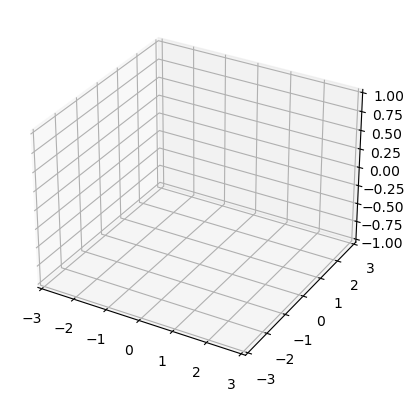

In [25]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

np.random.seed(42)
X = np.random.uniform(-1, 1, (100, 4))

# Set up the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the initial view limits
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-1, 1)

# Create the animation frames
frames = 100

# Generate the slices
slices = np.linspace(-1, 1, frames)

# Create the animation
def animate(frame):
    # Clear the plot
    ax.cla()

    # Set the view limits for the current frame
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_zlim(-1, 1)

    # Get the current slice value
    current_slice = slices[frame]

    # Filter the points based on the current slice value
    filtered_points = X[np.abs(X[:, 3] - current_slice) <= 2/frames]
    
    # Plot the filtered points
    ax.scatter(filtered_points[:, 0], filtered_points[:, 1], filtered_points[:, 2], s=10)

    # Set the title
    ax.set_title(f'Slice at z={current_slice:.2f}')

# Create the animation using the animate function and frames
ani = FuncAnimation(fig, animate, frames=frames, interval=100, repeat=False)

# Display the animation
plt.show()

In [23]:
ani

In [18]:
slices[1]

-0.9797979797979798